# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [50]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,252,84,44,80,140,58,11,156,44,20,157,166,349,176,74,5,17,183,193
1,392,93,44,90,166,65,10,153,44,19,156,170,348,143,66,9,17,194,203
2,66,81,43,68,125,57,8,149,46,19,146,169,323,172,83,6,18,179,184
3,248,103,55,103,211,65,11,212,31,24,165,229,673,249,72,5,16,188,196
4,237,85,45,65,128,56,8,151,45,19,145,170,332,186,81,1,10,179,184
5,28,102,45,85,193,64,6,192,33,22,146,217,570,163,76,6,7,195,193
6,214,89,36,72,141,56,7,138,48,18,126,163,286,130,72,1,1,187,192
7,519,88,39,76,155,62,8,137,48,18,137,156,281,124,63,3,6,201,209
8,830,97,37,70,173,66,7,151,43,19,129,167,346,119,65,0,16,201,208
9,130,100,46,104,184,60,9,197,34,23,147,222,578,198,73,13,13,189,197


Methods `describe` and `info` deliver some useful information.

In [51]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,411.311475,94.174863,45.116576,82.384335,170.149362,61.821494,8.677596,169.704918,40.721311,20.639344,148.593807,189.493625,444.981785,175.724954,72.409836,6.624772,12.431694,189.153005,195.874317
std,239.949826,8.286522,6.171594,15.925001,33.931010,7.931102,4.881055,33.672321,7.929475,2.621009,14.649208,31.636831,178.682873,32.512476,7.479264,5.000493,9.085230,6.168135,7.310917
min,1.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,177.000000,182.000000
25%,206.000000,88.000000,40.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,138.000000,168.000000,319.000000,151.000000,67.000000,3.000000,5.000000,185.000000,191.000000
50%,408.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,180.000000,366.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,611.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,218.000000,610.000000,198.000000,75.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,262.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [52]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### 2.0.1. Remove unnecessary feature
The first feature is simply the number of object in set, of course we don't need this in our classificator.

In [53]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

##### 2.0.2. Remove strongly correlated features
Because we want to use logistic regression (which based on linear regression, we remember about some problems that gives us the correlated features - can cause overfitting and instability). So, let's check the correlation of features.

Text(0.5, 1.0, 'Correlation')

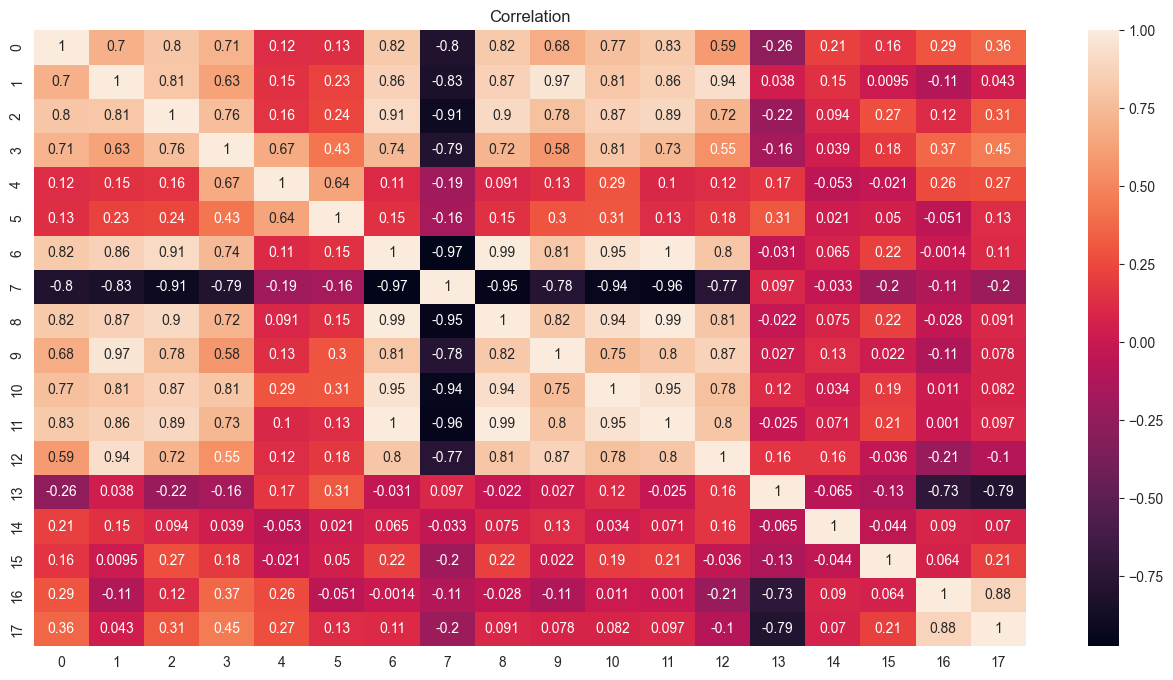

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

Let's choose the most correlated features and drop them from our dataset.

In [55]:
threshold = 0.92

corr_matrix = pd.DataFrame(X_train).corr().abs()
upper_tr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
dropped = [column for column in upper_tr.columns if any(upper_tr[column] > threshold)]

X_train = pd.DataFrame(X_train).drop(dropped, axis=1, inplace=False)
X_test = pd.DataFrame(X_test).drop(dropped, axis=1, inplace=False)

Text(0.5, 1.0, 'Correlation')

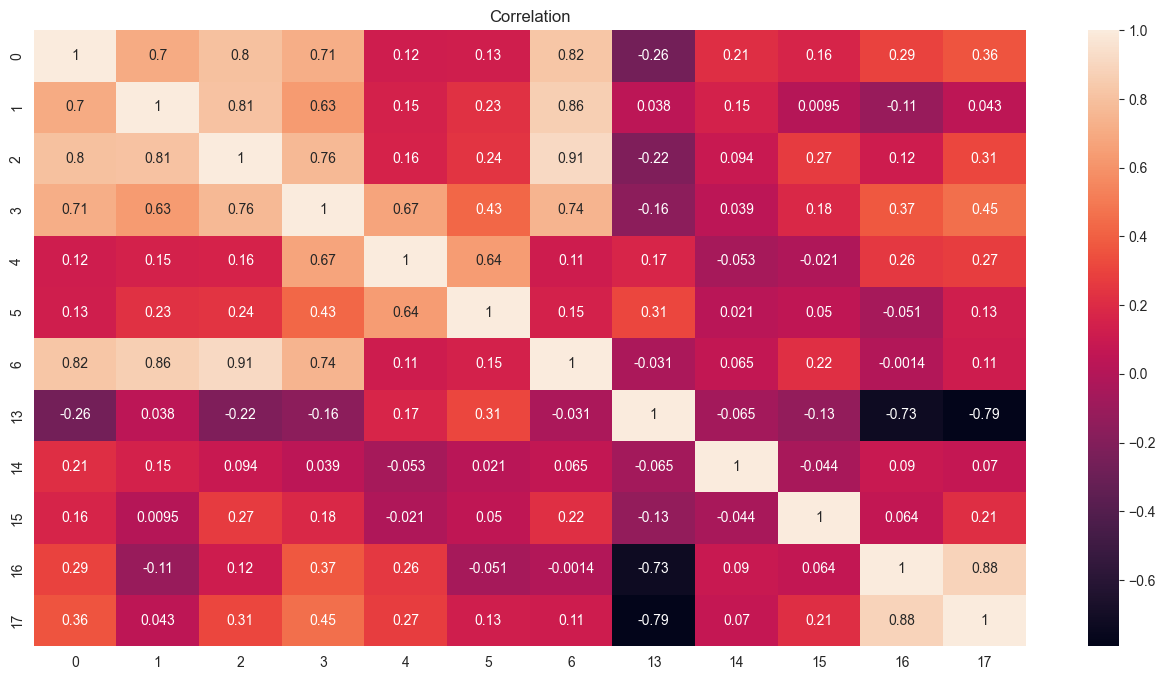

In [56]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

##### 2.0.3. Removing outliers
Below we will use logistic regression with MSE, so MSE is quite sensitive about outliers. To get better classifier we need to drop outliers.

In [57]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [58]:
# create mask
mask = yhat != -1

In [59]:
# remove all rows that are outliers
X_train, y_train = X_train.to_numpy()[mask, :], y_train[mask]

In [60]:
(X_train.shape, y_train.shape)

((537, 12), (537,))

##### 2.0.4. Normalization
Because we will be using logistic regression classificator, we need to normalize our dataset (in order to avoid gradient explosion).

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,-5.367112e-16,2.191502e-16,-3.638720e-16,-1.753201e-16,2.563643e-17,2.216311e-16,1.802820e-16,1.015534e-15,5.871571e-17,6.615854e-17,-7.657851e-16,2.480945e-17
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-2.201398e+00,-1.960518e+00,-2.526593e+00,-2.024138e+00,-2.562486e+00,-2.592914e+00,-1.677962e+00,-2.074501e+00,-1.317184e+00,-1.360088e+00,-1.993653e+00,-1.940246e+00
25%,-7.419525e-01,-8.165274e-01,-7.664183e-01,-8.644943e-01,-7.627804e-01,-9.372722e-01,-6.708438e-01,-7.873757e-01,-7.206188e-01,-8.114347e-01,-6.943913e-01,-6.967493e-01
50%,-1.338504e-01,-1.628185e-01,-2.006478e-01,-1.826807e-02,-4.289802e-02,-1.094512e-01,-3.656564e-01,-1.438129e-01,-1.240531e-01,-1.530508e-01,-4.476042e-02,1.322486e-01
75%,7.174925e-01,8.177448e-01,9.937566e-01,8.279581e-01,6.769844e-01,7.183698e-01,9.771677e-01,4.997499e-01,6.713678e-01,6.150638e-01,6.048705e-01,6.849138e-01
max,3.028280e+00,2.288590e+00,1.873844e+00,2.050285e+00,2.476690e+00,6.927027e+00,2.777773e+00,2.913110e+00,3.057631e+00,3.138869e+00,2.391355e+00,2.066577e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight' : ['balanced', None],
    'penalty' : ['l1', 'l2', None, 'elasticnet'],
    'C' : [0.01, 0.1, 1.0, 10, 100]
}
grid_cv = GridSearchCV(logreg, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=10, refit=False)
grid_cv.fit(X_train, y_train)

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_rati

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_rati

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', None, 'elasticnet']},
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [66]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.16996586395507124 accuracy: 0.30733752620545074 
params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
f1_weighted: 0.6176110528780652 accuracy: 0.6388888888888888 
params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
f1_weighted: 0.7690146954106385 accuracy: 0.7725716282320055 
params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': None}
f1_weighted: nan accuracy: nan 
params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'elasticnet'}
f1_weighted: 0.11358796184593607 accuracy: 0.2682389937106919 
params: {'C': 0.01, 'class_weight': None, 'penalty': 'l1'}
f1_weighted: 0.6278425605608667 accuracy: 0.6408455625436758 
params: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
f1_weighted: 0.7717103061124568 accuracy: 0.7744234800838574 
params: {'C': 0.01, 'class_weight': None, 'penalty': None}
f1_weighted: nan accuracy: nan 
params: {'C': 0.01, 'class_weight': None, 'penalty': 'elasticnet'}
f1_weighted: 0.6552346914537133 accuracy: 0.67417

In [72]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

28 28


In [74]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.7781621243885394 0.7754568468540678


In [75]:
best_params_lr = grid_cv.cv_results_['params'][best_acc_idx]
logreg.set_params(**best_params_lr)

LogisticRegression(C=10, max_iter=500, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.001)

In [76]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

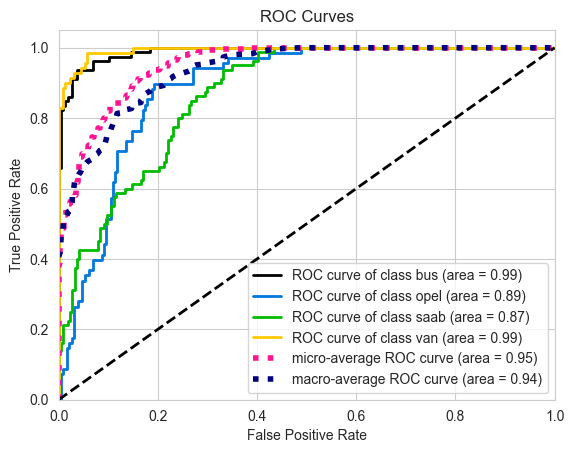

In [77]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_pred)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [78]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((537, 12), (537,), (297, 12), (297,))

Use our pre-processed data in PCA

In [80]:
np.var(np.concatenate((X_train, X_test), axis=0))

1.0927250528771701

In [81]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

array([[ 1.29654227,  0.73085604, -0.01722582, ..., -0.00634349,
         0.00415117, -0.10535759],
       [-0.95903726, -1.41809678,  0.39201894, ..., -0.41324112,
         0.37648977, -0.12201204],
       [ 3.21572036,  1.81412989, -0.1431975 , ...,  0.06862445,
         0.05644135, -0.06129759],
       ...,
       [ 0.60306592,  0.5275918 ,  1.34002258, ..., -0.46792525,
        -0.04353983,  0.18466061],
       [-2.97154631,  1.34585559,  0.07392423, ..., -0.06394565,
         0.02551403,  0.15392641],
       [ 0.61769159, -2.36115455, -0.25923138, ..., -0.15147829,
         0.1571833 , -0.01690034]])

Text(0, 0.5, 'explained variance ration')

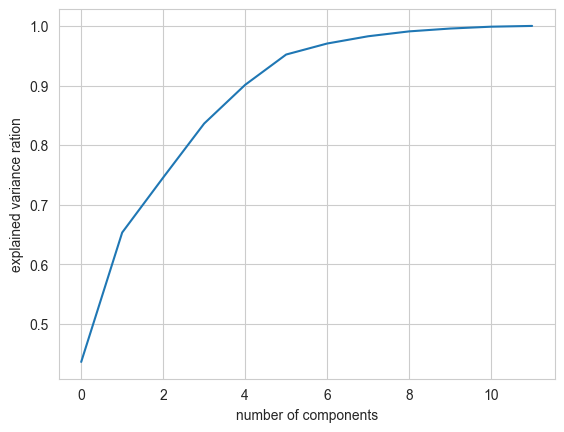

In [82]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ration')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Normalizing data is very important in PCA.  
As we can see from graph above, we need to use 10 principal components to get best result.

In [34]:
pca = PCA(n_components=10)
pca.fit_transform(X_train).shape

(536, 10)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [83]:
from sklearn.pipeline import Pipeline
pca = PCA(n_components=10)
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
estimators = [('pca', pca), ('log_reg', log_reg)]
pipeline = Pipeline(estimators)
pipeline

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('log_reg',
                 LogisticRegression(multi_class='multinomial', solver='saga',
                                    tol=0.001))])

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'log_reg__class_weight' : ['balanced', None],
    'log_reg__penalty' : ['l1', 'l2', None, 'elasticnet'],
    'log_reg__C' : [0.01, 0.1, 1.0, 10, 100]
}
grid_cv = GridSearchCV(pipeline, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=10, refit=False)
grid_cv.fit(X_train, y_train)

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(n_components=10)),
                                       ('log_reg',
                                        LogisticRegression(multi_class='multinomial',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'log_reg__C': [0.01, 0.1, 1.0, 10, 100],
                         'log_reg__class_weight': ['balanced', None],
                         'log_reg__penalty': ['l1', 'l2', None, 'elasticnet']},
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [38]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.7273960804540472 accuracy: 0.7350986500519211 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l1'}
f1_weighted: 0.725200784016558 accuracy: 0.7331429560401522 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l2'}
f1_weighted: 0.7312306034889063 accuracy: 0.7350813430252682 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': None}
f1_weighted: nan accuracy: nan 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'elasticnet'}
f1_weighted: 0.7302379737953167 accuracy: 0.7388369678089305 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': None, 'log_reg__penalty': 'l1'}
f1_weighted: 0.7223220281685127 accuracy: 0.7312737971616475 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': None, 'log_reg__penalty': 'l2'}
f1_weighted: 0.7303973174679054 accuracy: 0.7350813430252683 
params: {'log_reg__C': 0.5, 'log_reg__class_weight': No

In [87]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

16 33


In [88]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.754053109713487 0.7465624058316022


In [89]:
best_params_lr = grid_cv.cv_results_['params'][best_acc_idx]
pipeline.set_params(**best_params_lr)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced',
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga', tol=0.001))])

In [90]:
pipeline.fit(X_train, y_train)
predicted_test = pipeline.predict_proba(X_test)

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

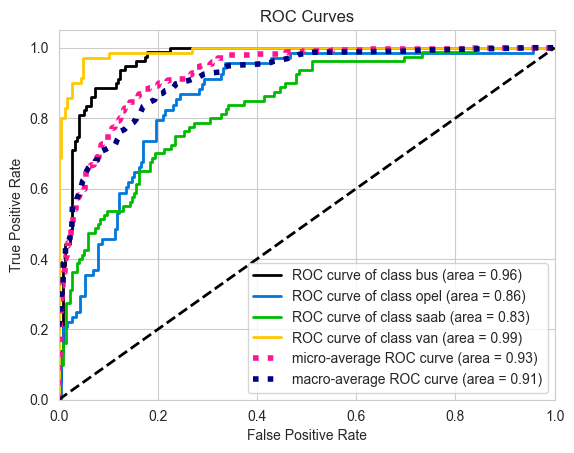

In [91]:
skplt.metrics.plot_roc(y_test, predicted_test)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Since we use desicion tree as classifier, we don't need to normalize, remove correlated features, drop outliers and PCA. Because decision tree analysing features independent at each node.

So, we only need to delete first (index) columns from dataset.

In [123]:
print(data.shape, target.shape)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(data, target, test_size=0.35)
print(X_train_dt.shape, y_train_dt.shape, X_test_dt.shape, y_test_dt.shape)

X_train_dt = X_train_dt[:, 1:]
X_test_dt = X_test_dt[:, 1:]
print(X_train_dt.shape, y_train_dt.shape, X_test_dt.shape, y_test_dt.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)
(549, 18) (549,) (297, 18) (297,)


In [131]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_grid = [
  {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, None]}
]
grid_cv = GridSearchCV(dtc, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=5, refit=False)
grid_cv.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30,
                                        None]}],
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [132]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.4344254997561059 accuracy: 0.5081734778982485 
params: {'max_depth': 2}
f1_weighted: 0.5940818973970803 accuracy: 0.6302919099249374 
params: {'max_depth': 3}
f1_weighted: 0.6168832304167463 accuracy: 0.6320767306088408 
params: {'max_depth': 4}
f1_weighted: 0.6291009377032133 accuracy: 0.6357130942452044 
params: {'max_depth': 5}
f1_weighted: 0.6707390435637766 accuracy: 0.6776146788990826 
params: {'max_depth': 6}
f1_weighted: 0.6374179612832218 accuracy: 0.6466555462885738 
params: {'max_depth': 7}
f1_weighted: 0.6498551145822723 accuracy: 0.6521768140116764 
params: {'max_depth': 8}
f1_weighted: 0.6602568679322492 accuracy: 0.6612510425354462 
params: {'max_depth': 9}
f1_weighted: 0.6519003055264726 accuracy: 0.6503085904920768 
params: {'max_depth': 10}
f1_weighted: 0.657980691260416 accuracy: 0.6576146788990826 
params: {'max_depth': 15}
f1_weighted: 0.6585896889911276 accuracy: 0.6575979983319432 
params: {'max_depth': 20}
f1_weighted: 0.6670239809077838 accuracy:

In [133]:
best_acc_idx, best_f1_idx = np.nanargmax(grid_cv.cv_results_['mean_test_accuracy']), np.nanargmax(grid_cv.cv_results_['mean_test_f1_weighted'])
print(best_acc_idx, best_f1_idx)

4 4


In [134]:
print(grid_cv.cv_results_['mean_test_accuracy'][best_acc_idx], grid_cv.cv_results_['mean_test_f1_weighted'][best_f1_idx])

0.6776146788990826 0.6707390435637766


In [135]:
best_params_dt = grid_cv.cv_results_['params'][best_acc_idx]
dtc.set_params(**best_params_dt)

DecisionTreeClassifier(max_depth=6)

In [136]:
dtc.fit(X_train_dt, y_train_dt)
predicted_test = dtc.predict_proba(X_test_dt)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

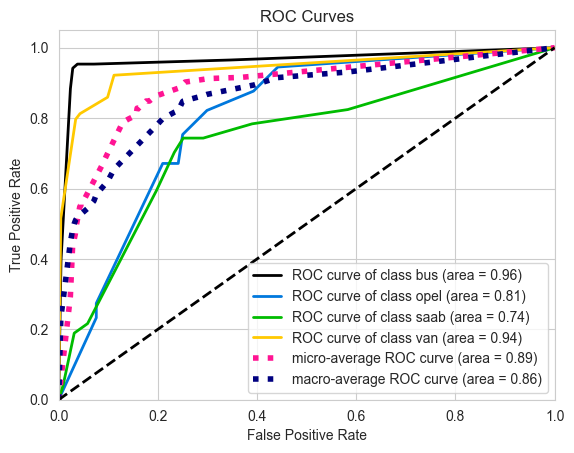

In [137]:
skplt.metrics.plot_roc(y_test_dt, predicted_test)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [138]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = X_train, X_test, y_train, y_test  # fully preprocessed data for log_reg

In [141]:
print(f"shapes of data for log_reg: X_train - {X_train_lr.shape}, X_test - {X_test_lr.shape}, y_train - {y_train_lr.shape}, y_test - {y_test_lr.shape},")
print(f"shapes of data for dec_tree: X_train - {X_train_dt.shape}, X_test - {X_test_dt.shape}, y_train - {y_train_dt.shape}, y_test - {y_test_dt.shape},")

shapes of data for log_reg: X_train - (537, 12), X_test - (297, 12), y_train - (537,), y_test - (297,),
shapes of data for dec_tree: X_train - (549, 18), X_test - (297, 18), y_train - (549,), y_test - (297,),


In [205]:
print("optimal hyperparameters for log_reg: C=10, max_iter=500, multi_class='multinomial', penalty='l1', solver='saga', tol=0.001")
print(f"optimal hyperparameters for dec_tree {best_params_dt}")

optimal hyperparameters for log_reg: C=10, max_iter=500, multi_class='multinomial', penalty='l1', solver='saga', tol=0.001
optimal hyperparameters for dec_tree {'max_depth': 6}


In [206]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, C=10, class_weight=None, penalty='l1')
dt = DecisionTreeClassifier(max_depth=6)

In [207]:
n_min = 2
n_max = 100
n_step = 5

In [208]:
len(X_train_lr)

537

In [175]:
# from sklearn.utils import resample

# X_train_lr_bootstrap_arr = np.zeros(shape=(n_max + n_step, X_train_lr.shape[0], X_train_lr.shape[1]))
# y_train_lr_bootstrap_arr = np.zeros(shape=(n_max + n_step, y_train_lr.shape[0]), dtype=object)

# X_train_dt_bootstrap_arr = np.zeros(shape=(n_max + n_step, X_train_dt.shape[0], X_train_dt.shape[1]))
# y_train_dt_bootstrap_arr = np.zeros(shape=(n_max + n_step, y_train_dt.shape[0]), dtype=object)

# for n in range(n_max + n_step):
#     X_train_lr_bootstrap_arr[n], y_train_lr_bootstrap_arr[n] = resample(X_train_lr, y_train_lr)
#     X_train_dt_bootstrap_arr[n], y_train_dt_bootstrap_arr[n] = resample(X_train_dt, y_train_dt)

In [209]:
from sklearn.ensemble import BaggingClassifier

lr_bag = BaggingClassifier(estimator=lr, max_features=X_train_lr.shape[1], 
                               bootstrap=True, oob_score=True, n_jobs=-1)
dt_bag = BaggingClassifier(estimator=dt, max_features=X_train_dt.shape[1], 
                               bootstrap=True, oob_score=True, n_jobs=-1)

param_grid = {
    'n_estimators': [n for n in range(n_min, n_max + n_step, n_step)],
}

In [187]:
grid_cv_dt = GridSearchCV(estimator=dt_bag, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False, verbose=4)
grid_cv_dt.fit(X_train_dt, y_train_dt)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppDa

[CV 1/5] END n_estimators=2; accuracy: (test=0.645) f1_weighted: (test=0.645) total time=   2.5s
[CV 2/5] END n_estimators=2; accuracy: (test=0.655) f1_weighted: (test=0.653) total time=   0.0s
[CV 3/5] END n_estimators=2; accuracy: (test=0.627) f1_weighted: (test=0.622) total time=   0.0s
[CV 4/5] END n_estimators=2; accuracy: (test=0.736) f1_weighted: (test=0.719) total time=   0.0s
[CV 5/5] END n_estimators=2; accuracy: (test=0.661) f1_weighted: (test=0.662) total time=   0.0s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppDa

[CV 1/5] END n_estimators=7; accuracy: (test=0.645) f1_weighted: (test=0.632) total time=   3.2s
[CV 2/5] END n_estimators=7; accuracy: (test=0.727) f1_weighted: (test=0.722) total time=   0.0s
[CV 3/5] END n_estimators=7; accuracy: (test=0.636) f1_weighted: (test=0.619) total time=   0.0s
[CV 4/5] END n_estimators=7; accuracy: (test=0.709) f1_weighted: (test=0.699) total time=   0.0s
[CV 5/5] END n_estimators=7; accuracy: (test=0.716) f1_weighted: (test=0.706) total time=   0.0s
[CV 1/5] END n_estimators=12; accuracy: (test=0.691) f1_weighted: (test=0.674) total time=   0.0s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppDa

[CV 2/5] END n_estimators=12; accuracy: (test=0.709) f1_weighted: (test=0.700) total time=   0.0s
[CV 3/5] END n_estimators=12; accuracy: (test=0.691) f1_weighted: (test=0.679) total time=   0.0s
[CV 4/5] END n_estimators=12; accuracy: (test=0.727) f1_weighted: (test=0.716) total time=   0.0s
[CV 5/5] END n_estimators=12; accuracy: (test=0.670) f1_weighted: (test=0.657) total time=   0.0s
[CV 1/5] END n_estimators=17; accuracy: (test=0.709) f1_weighted: (test=0.702) total time=   0.0s
[CV 2/5] END n_estimators=17; accuracy: (test=0.700) f1_weighted: (test=0.697) total time=   0.0s
[CV 3/5] END n_estimators=17; accuracy: (test=0.736) f1_weighted: (test=0.723) total time=   0.0s
[CV 4/5] END n_estimators=17; accuracy: (test=0.691) f1_weighted: (test=0.681) total time=   0.0s
[CV 5/5] END n_estimators=17; accuracy: (test=0.734) f1_weighted: (test=0.735) total time=   0.0s
[CV 1/5] END n_estimators=22; accuracy: (test=0.700) f1_weighted: (test=0.673) total time=   0.0s
[CV 2/5] END n_estim

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 4/5] END n_estimators=22; accuracy: (test=0.700) f1_weighted: (test=0.679) total time=   0.0s
[CV 5/5] END n_estimators=22; accuracy: (test=0.734) f1_weighted: (test=0.730) total time=   0.0s
[CV 1/5] END n_estimators=27; accuracy: (test=0.736) f1_weighted: (test=0.721) total time=   0.0s
[CV 2/5] END n_estimators=27; accuracy: (test=0.718) f1_weighted: (test=0.711) total time=   0.0s
[CV 3/5] END n_estimators=27; accuracy: (test=0.682) f1_weighted: (test=0.661) total time=   0.0s
[CV 4/5] END n_estimators=27; accuracy: (test=0.727) f1_weighted: (test=0.709) total time=   0.0s
[CV 5/5] END n_estimators=27; accuracy: (test=0.771) f1_weighted: (test=0.764) total time=   0.0s
[CV 1/5] END n_estimators=32; accuracy: (test=0.736) f1_weighted: (test=0.721) total time=   0.0s
[CV 2/5] END n_estimators=32; accuracy: (test=0.727) f1_weighted: (test=0.722) total time=   0.0s
[CV 3/5] END n_estimators=32; accuracy: (test=0.700) f1_weighted: (test=0.678) total time=   0.0s
[CV 4/5] END n_estim

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                                         max_features=18, n_jobs=-1,
                                         oob_score=True),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             refit=False, scoring=['f1_weighted', 'accuracy'], verbose=4)

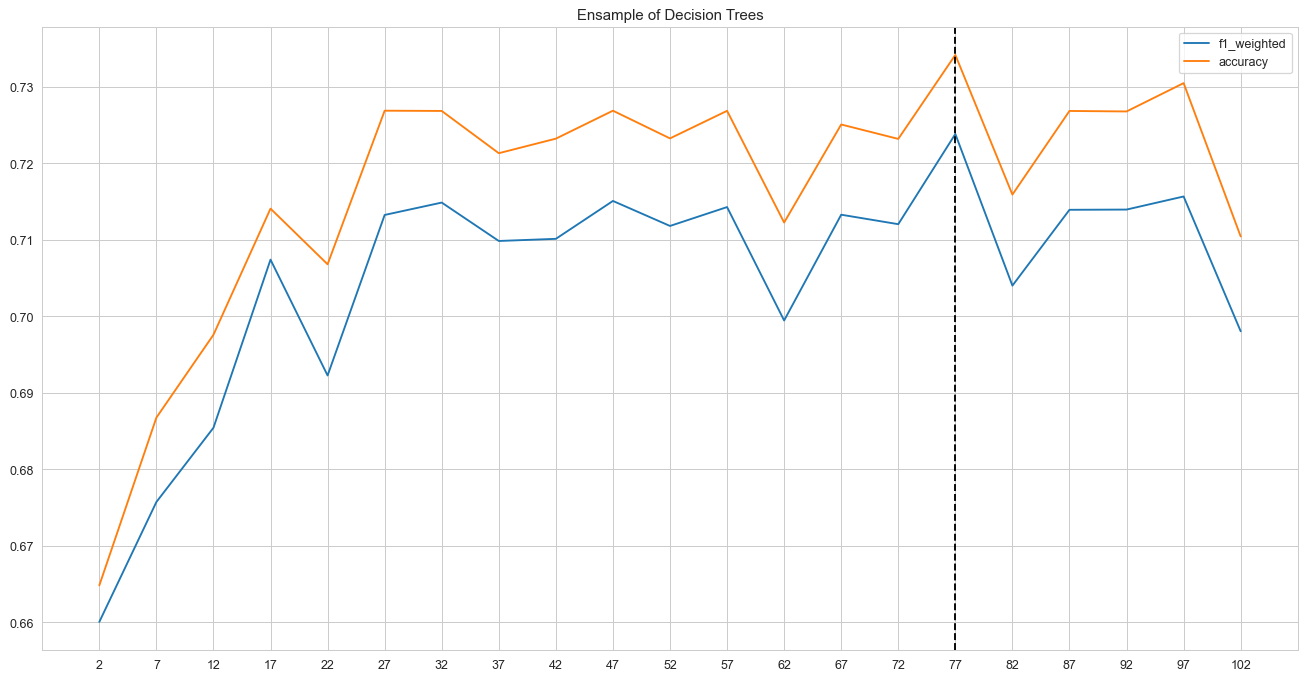

In [192]:
best_param_bagging_dt = grid_cv_dt.param_grid['n_estimators'][
    ((grid_cv_dt.cv_results_['mean_test_f1_weighted'] + grid_cv_dt.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv_dt.param_grid['n_estimators'], grid_cv_dt.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv_dt.param_grid['n_estimators'], grid_cv_dt.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv_dt.param_grid['n_estimators'])
plt.axvline(best_param_bagging_dt, linestyle='--', color='black')
plt.title('Ensample of Decision Trees')
plt.legend()

Optimal number of estimators in bagging for decistion trees is 77.  
So, the accuracy and f1 metrics are increased with bagging relatively to the simple decision tree with the same hyperparameters.  


In [210]:
grid_cv_lr = GridSearchCV(estimator=lr_bag, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False, verbose=4)
grid_cv_lr.fit(X_train_lr, y_train_lr)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppDa

[CV 1/5] END n_estimators=2; accuracy: (test=0.796) f1_weighted: (test=0.790) total time=   2.0s
[CV 2/5] END n_estimators=2; accuracy: (test=0.722) f1_weighted: (test=0.715) total time=   0.0s
[CV 3/5] END n_estimators=2; accuracy: (test=0.794) f1_weighted: (test=0.790) total time=   0.0s
[CV 4/5] END n_estimators=2; accuracy: (test=0.794) f1_weighted: (test=0.792) total time=   0.0s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 5/5] END n_estimators=2; accuracy: (test=0.710) f1_weighted: (test=0.712) total time=   0.0s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=7; accuracy: (test=0.824) f1_weighted: (test=0.823) total time=   3.3s
[CV 2/5] END n_estimators=7; accuracy: (test=0.741) f1_weighted: (test=0.734) total time=   0.1s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 3/5] END n_estimators=7; accuracy: (test=0.785) f1_weighted: (test=0.781) total time=   0.1s
[CV 4/5] END n_estimators=7; accuracy: (test=0.757) f1_weighted: (test=0.752) total time=   0.0s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 5/5] END n_estimators=7; accuracy: (test=0.710) f1_weighted: (test=0.709) total time=   0.1s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 1/5] END n_estimators=12; accuracy: (test=0.815) f1_weighted: (test=0.814) total time=   0.2s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 2/5] END n_estimators=12; accuracy: (test=0.731) f1_weighted: (test=0.726) total time=   0.2s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 3/5] END n_estimators=12; accuracy: (test=0.804) f1_weighted: (test=0.801) total time=   0.1s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 4/5] END n_estimators=12; accuracy: (test=0.757) f1_weighted: (test=0.752) total time=   0.2s
[CV 5/5] END n_estimators=12; accuracy: (test=0.729) f1_weighted: (test=0.729) total time=   0.1s
[CV 1/5] END n_estimators=17; accuracy: (test=0.824) f1_weighted: (test=0.823) total time=   0.2s
[CV 2/5] END n_estimators=17; accuracy: (test=0.759) f1_weighted: (test=0.756) total time=   0.2s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 3/5] END n_estimators=17; accuracy: (test=0.822) f1_weighted: (test=0.820) total time=   0.3s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 4/5] END n_estimators=17; accuracy: (test=0.748) f1_weighted: (test=0.743) total time=   0.4s


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[CV 5/5] END n_estimators=17; accuracy: (test=0.720) f1_weighted: (test=0.720) total time=   0.3s
[CV 1/5] END n_estimators=22; accuracy: (test=0.806) f1_weighted: (test=0.806) total time=   0.4s
[CV 2/5] END n_estimators=22; accuracy: (test=0.722) f1_weighted: (test=0.717) total time=   0.3s
[CV 3/5] END n_estimators=22; accuracy: (test=0.832) f1_weighted: (test=0.829) total time=   0.3s
[CV 4/5] END n_estimators=22; accuracy: (test=0.776) f1_weighted: (test=0.772) total time=   0.3s
[CV 5/5] END n_estimators=22; accuracy: (test=0.720) f1_weighted: (test=0.720) total time=   0.4s
[CV 1/5] END n_estimators=27; accuracy: (test=0.815) f1_weighted: (test=0.814) total time=   0.5s
[CV 2/5] END n_estimators=27; accuracy: (test=0.722) f1_weighted: (test=0.717) total time=   0.5s
[CV 3/5] END n_estimators=27; accuracy: (test=0.813) f1_weighted: (test=0.810) total time=   0.6s
[CV 4/5] END n_estimators=27; accuracy: (test=0.757) f1_weighted: (test=0.752) total time=   0.5s
[CV 5/5] END n_estim

[CV 4/5] END n_estimators=102; accuracy: (test=0.766) f1_weighted: (test=0.761) total time=   1.7s
[CV 5/5] END n_estimators=102; accuracy: (test=0.710) f1_weighted: (test=0.711) total time=   1.6s


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=LogisticRegression(C=10,
                                                                      multi_class='multinomial',
                                                                      penalty='l1',
                                                                      solver='saga',
                                                                      tol=0.001),
                                         max_features=12, n_jobs=-1,
                                         oob_score=True),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             refit=False, scoring=['f1_weighted', 'accuracy'], verbose=4)

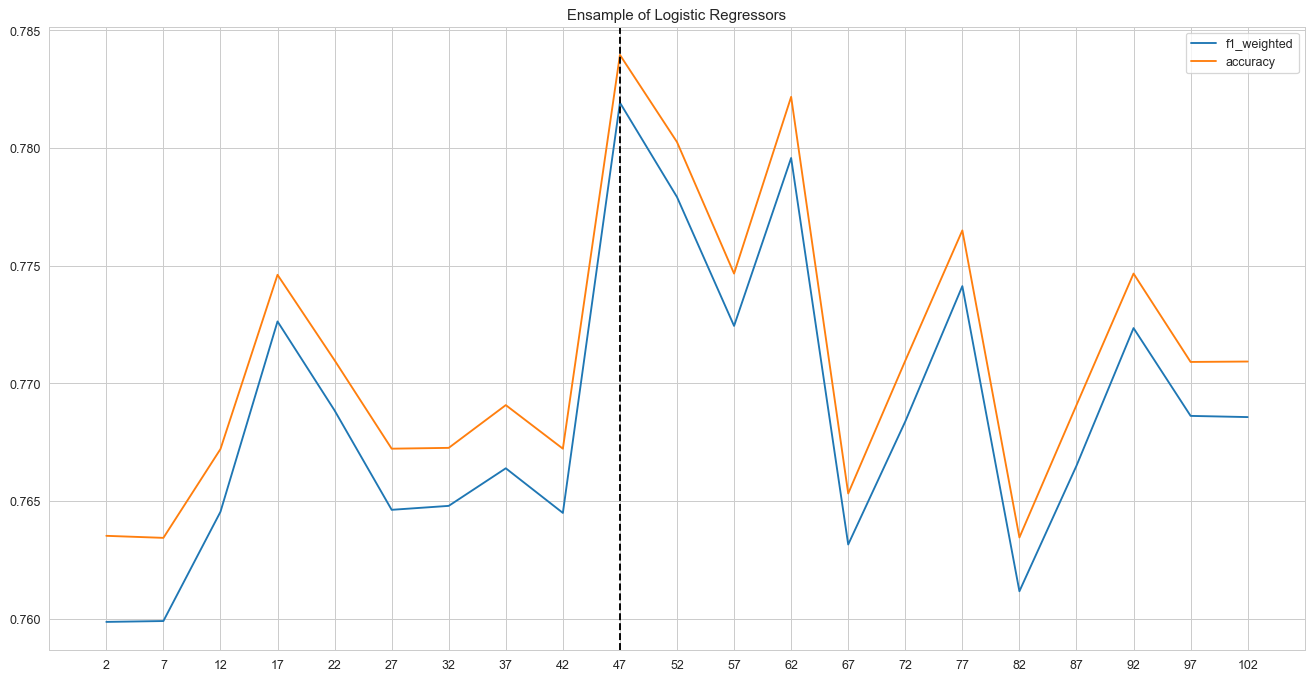

In [211]:
best_param_bagging_lr = grid_cv_lr.param_grid['n_estimators'][
    ((grid_cv_lr.cv_results_['mean_test_f1_weighted'] + grid_cv_lr.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv_lr.param_grid['n_estimators'], grid_cv_lr.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv_lr.param_grid['n_estimators'], grid_cv_lr.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv_lr.param_grid['n_estimators'])
plt.axvline(best_param_bagging_lr, linestyle='--', color='black')
plt.title('Ensample of Logistic Regressors')
plt.legend()

The optimal number of estimators in bagging with log_reg is 47.  
The accuracy and f1 metrics are increased relatively to the single log_reg estimator with the same hyperparameters.  

Hence base estimator should be simple, so ensamble of best decision trees is not the best ensamble.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [193]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

grid_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False)
grid_cv.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97, 102]},
             refit=False, scoring=['f1_weighted', 'accuracy'])

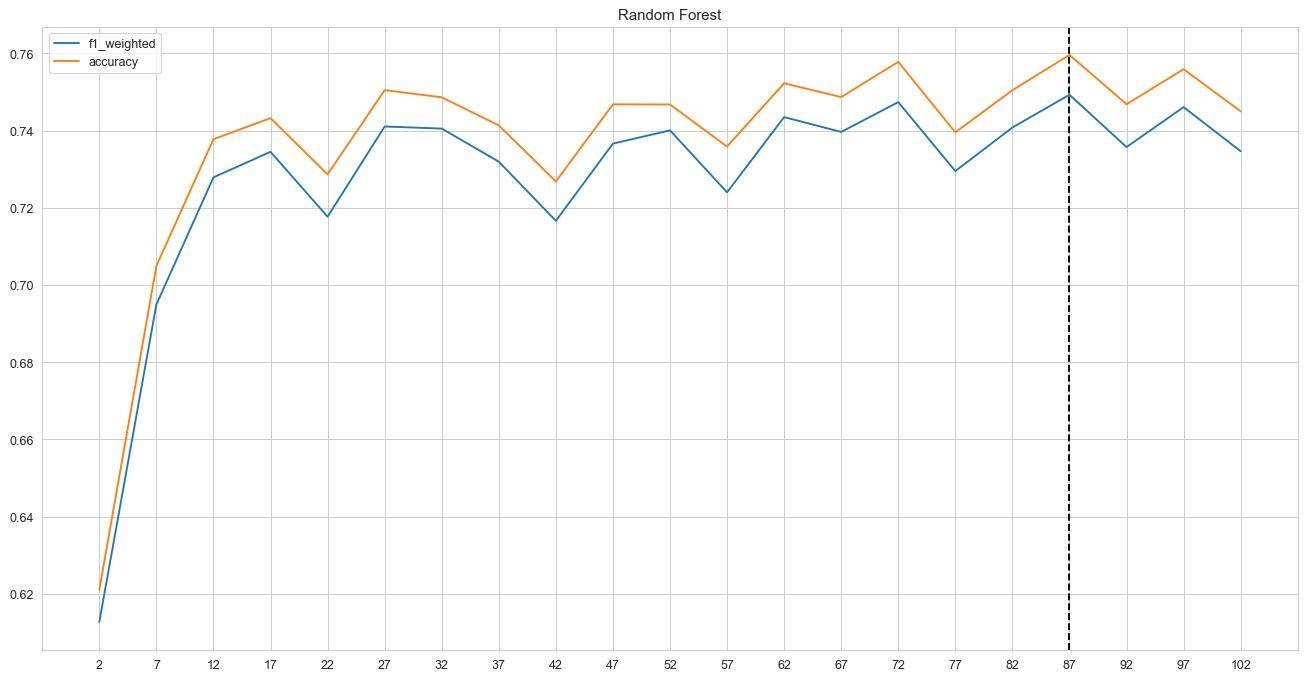

In [194]:
best_param_rf = grid_cv.param_grid['n_estimators'][
    ((grid_cv.cv_results_['mean_test_f1_weighted'] + grid_cv.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(grid_cv.param_grid['n_estimators'], grid_cv.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv.param_grid['n_estimators'], grid_cv.cv_results_['mean_test_accuracy'],
         label = "accuracy")

plt.xticks(grid_cv.param_grid['n_estimators'])
plt.axvline(best_param_rf, linestyle='--', color='black')
plt.title('Random Forest')
plt.legend()

The optimal value is 87 (in boosting with dt it was 77) - it's quite similar, because the RFC ad boosting with DT are differs only features selection (RFC uses random subspace method - it takes sqrt number of features in each node).  
Worth noting, that f1 and accuracy metrics are increased w.r.t. bagging with DT. 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [203]:
X_train_lr_splits = np.array_split(X_train_lr, 10, axis=0)
y_train_lr_splits = np.array_split(y_train_lr, 10, axis=0)
X_train_lr.shape

(537, 12)

In [212]:
for i in range(10):
     print(X_train_lr_splits[i].shape, y_train_lr_splits[i].shape)

(54, 12) (54,)
(54, 12) (54,)
(54, 12) (54,)
(54, 12) (54,)
(54, 12) (54,)
(54, 12) (54,)
(54, 12) (54,)
(53, 12) (53,)
(53, 12) (53,)
(53, 12) (53,)


In [204]:
X_train_dt_splits = np.array_split(X_train_dt, 10, axis=0)
y_train_dt_splits = np.array_split(y_train_dt, 10, axis=0)
X_train_dt.shape

(549, 18)

In [216]:
from sklearn.metrics import f1_score, accuracy_score

lr_metrics = np.zeros((10, 2))
dt_metrics = np.zeros((10, 2))
rfc_metrics = np.zeros((10, 2))

for i in range(10):
    lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, C=10, class_weight=None, penalty='l1')
    dt = DecisionTreeClassifier(max_depth=6)
    rfc = RandomForestClassifier(n_estimators=87)
    
    lr.fit(X_train_lr_splits[i], y_train_lr_splits[i])
    dt.fit(X_train_dt_splits[i], y_train_dt_splits[i])
    rfc.fit(X_train_dt_splits[i], y_train_dt_splits[i])
    
    lr_pred = lr.predict(X_test_lr)
    dt_pred = dt.predict(X_test_dt)
    rfc_pred = rfc.predict(X_test_dt)
    
    lr_metrics[i] = [f1_score(y_test_lr, lr_pred, average='weighted'), accuracy_score(y_test_lr, lr_pred)]
    dt_metrics[i] = [f1_score(y_test_dt, dt_pred, average='weighted'), accuracy_score(y_test_dt, dt_pred)]
    rfc_metrics[i] = [f1_score(y_test_dt, rfc_pred, average='weighted'), accuracy_score(y_test_dt, rfc_pred)]

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [221]:
x_ticks_lr = np.zeros(10)
x_ticks_lr[0] = X_train_lr_splits[0].shape[0]
for i in range(1, 10):
    x_ticks_lr[i] = X_train_lr_splits[i].shape[0] + x_ticks_lr[i-1]

x_ticks_dt_rfc = np.zeros(10)
x_ticks_dt_rfc[0] = X_train_dt_splits[0].shape[0]
for i in range(1, 10):
    x_ticks_dt_rfc[i] = X_train_dt_splits[i].shape[0] + x_ticks_dt_rfc[i-1]

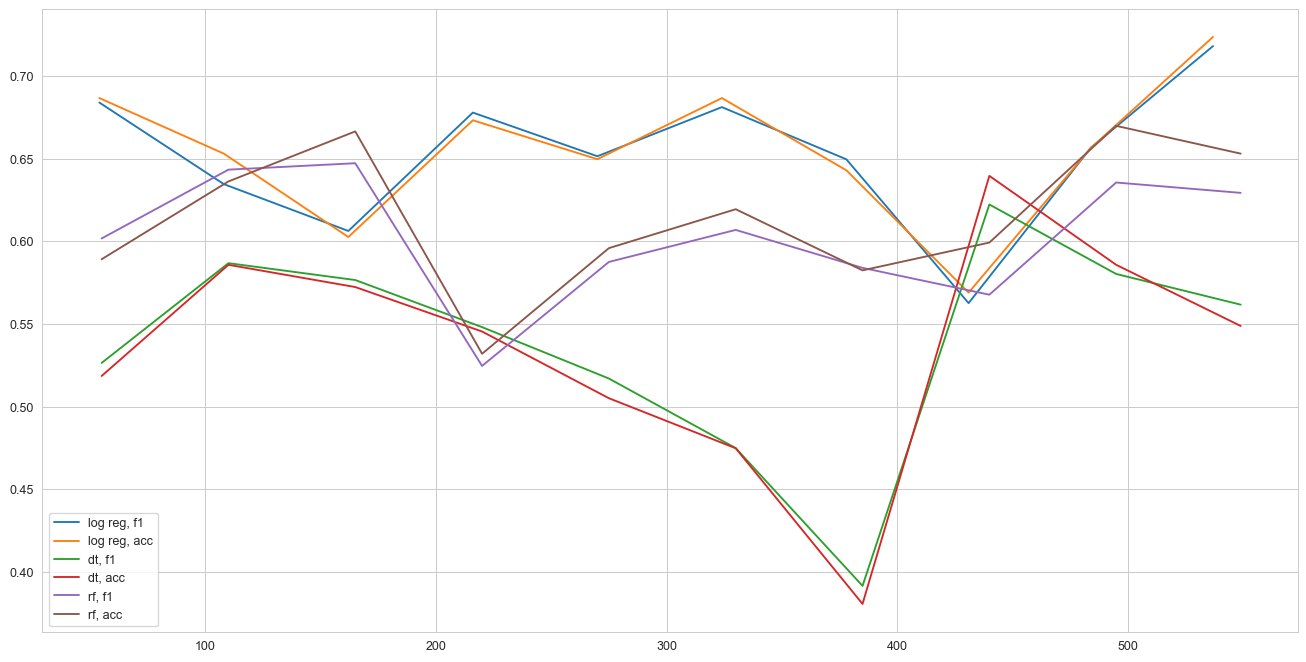

In [223]:
plt.figure(figsize=(18, 9), dpi=90)
plt.plot(x_ticks_lr, lr_metrics[:, 0], label = "log reg, f1")
plt.plot(x_ticks_lr, lr_metrics[:, 1], label = "log reg, acc")

plt.plot(x_ticks_dt_rfc, dt_metrics[:, 0], label = "dt, f1")
plt.plot(x_ticks_dt_rfc, dt_metrics[:, 1], label = "dt, acc")

plt.plot(x_ticks_dt_rfc, rfc_metrics[:, 0], label = "rf, f1")
plt.plot(x_ticks_dt_rfc, rfc_metrics[:, 1], label = "rf, acc")
plt.legend()